# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [13]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [14]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Leo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


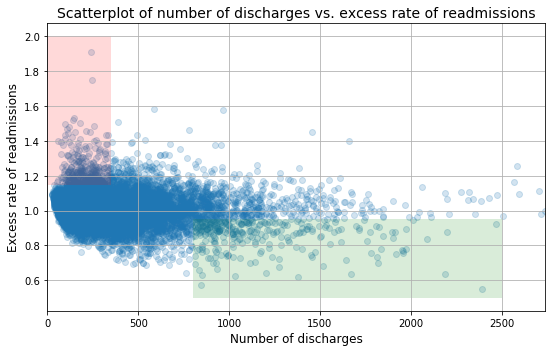

In [15]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [11]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


### Do you agree with the above analysis and recommendations? Why or why not?

#### A1. Overall, rate of readmissions is trending down with increasing number of discharges

C:\Users\Leo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


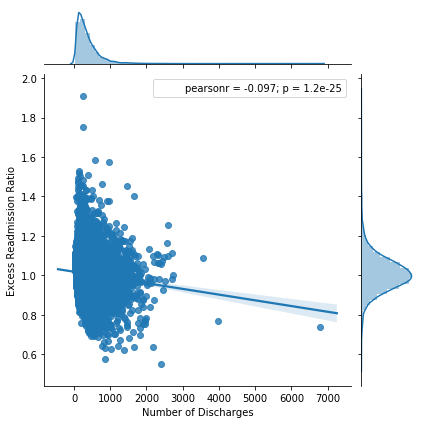

In [24]:
g = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, kind='reg')
g = g.annotate(stats.pearsonr)

As seen above, there is a negative correlation between discharges and readmission rate with a pearson correlation r equals -0.097. The close-to-zero p-value suggests that strong evidence that the correlation is indeed different than 0. Therefore, we can confirm the statement that the rate of readmissions is trending down with increasing number of discharges. 

#### A2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
#### A3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

The above statements can be interpreted as small hospitals (lower number of discharges) has a higher mean of readmission rate, and the big hospitals (higher number of discharges) has a lower mean of readmission rate. 

To test this, we can set up the hypothesis as follows:

H0: small hospitals and big hospitals have the same mean of readmission rate. 

HA: small hospitals have a higher mean of readmission rate than big hospitals. 

In [26]:
low_discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<=350]
high_discharges = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']>=800) 
                                         & (clean_hospital_read_df['Number of Discharges']<=2500)]

In [44]:
low_discharge_ratio = low_discharges['Excess Readmission Ratio'].dropna()
high_discharges_ratio = high_discharges['Excess Readmission Ratio'].dropna()
mu_l = np.mean(low_discharge_ratio)
mu_h = np.mean(high_discharges_ratio)
mu_diff = mu_l - mu_h
print('small hospital readmission rate: ', mu_l)
print('big hospital readmission rate: ', mu_h)
print('difference in readmission rate: ', mu_diff)

small hospital readmission rate:  1.0132787273505486
big hospital readmission rate:  0.985242217245241
difference in readmission rate:  0.02803651010530761


In [57]:
## p-value by 2 sample bootstrapping
mu = np.mean(np.concatenate((low_discharge_ratio, high_discharges_ratio)))
low_discharge_ratio_shifted = low_discharge_ratio + (mu - mu_l)
high_discharges_ratio_shifted = high_discharges_ratio + (mu - mu_h)

def draw_bs_reps(data, func, size=1):
    bs_reps = np.empty(size)
    
    for i in range(size):
        bs_samples = np.random.choice(data, len(data))
        bs_reps[i] = func(bs_samples)
    return bs_reps

bs_replicates_l = draw_bs_reps(low_discharge_ratio_shifted, np.mean, 10000)
bs_replicates_h = draw_bs_reps(high_discharges_ratio_shifted, np.mean, 10000)
bs_replicates_diff = bs_replicates_l - bs_replicates_h

p = np.sum(bs_replicates_diff>=mu)/len(bs_replicates_diff)
print('p-value: ', p)

p-value:  0.0


The p-value under the bootstrap tests is extremely low (<0.01), so the null hypothesis that small hospitals and big hospitals have the same mean of readmission rate can be rejected. 

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Although we saw a correlation between number of discharges (hospital capacity) and excess readmission rate, I don't necessary agree to the suggestion to consolidate smaller hospitals into larger ones. The correlation coefficient we observed here is -0.097, which is a slight negative correlation. There could be other factors that are also associated with the readmission rate, such as hospital specialty, mortality rate, and factors that are out of hospital's control such as poverty level in the serving neighborhood. In addition, even though the correlation is statistically significant, we need to weigh the benefit against the cost of making the improvement, both short-term and long-term. 
I would suggest to analyze other factors that might affect the readmission rate first before making any recommendations. 

### What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

The given plot plots all the data points. It's easy to observe the density where most of the data lies. The correlation is not very obvious and the overlapping of observations makes it a bit hard to see the distribution. A joint plot shows both the individual data as well as the distribution of the two variables. The added regression line reveals the correlation and the pearson_r and p-value gives a statistics summary. 

C:\Users\Leo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


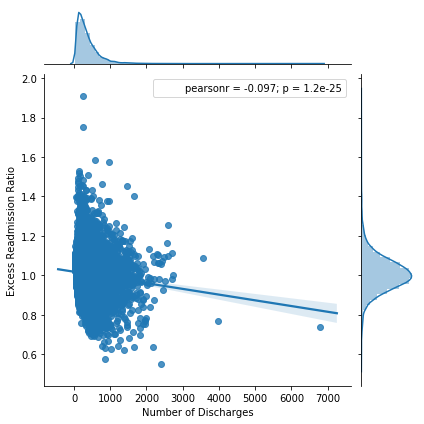

In [74]:
g = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, kind='reg')
g = g.annotate(stats.pearsonr)